# 1. Get Summary Statistics

First, let's borrow some data from the [UC Irvine Machine Learning Repository][data].

[data]: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
import eda_report
import pandas as pd

mpg_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
    sep='\s+',
    na_values="?",
    header=None,
    names=['mpg', 'cylinders', 'displacement', 'horsepower',
           'weight', 'acceleration', 'model_year', 'origin', 'name']
)
mpg_data["origin"] = mpg_data["origin"].map({1: "usa", 2: "japan", 3: "europe"})
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


In [2]:
eda_report.summarize(mpg_data)


		  Summary Statistics for Numeric features (6)
		  -------------------------------------------
                count        avg    stddev     min       25%     50%       75%   
  mpg             398    23.5146    7.8160     9.0    17.500    23.0    29.000  \
  displacement    398   193.4259  104.2698    68.0   104.250   148.5   262.000   
  horsepower      392   104.4694   38.4912    46.0    75.000    93.5   126.000   
  weight          398  2970.4246  846.8418  1613.0  2223.750  2803.5  3608.000   
  acceleration    398    15.5681    2.7577     8.0    13.825    15.5    17.175   
  model_year      398    76.0101    3.6976    70.0    73.000    76.0    79.000   

                   max  skewness  kurtosis  
  mpg             46.6    0.4571   -0.5108  
  displacement   455.0    0.7196   -0.7466  
  horsepower     230.0    1.0873    0.6969  
  weight        5140.0    0.5311   -0.7855  
  acceleration    24.8    0.2788    0.4195  
  model_year      82.0    0.0115   -1.1812  

		Summary St

In [3]:
eda_report.summarize(mpg_data["acceleration"])


Name: acceleration
Type: numeric
Non-null Observations: 398
Unique Values: 95 -> [8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.1, [...]
Missing Values: None

		  Summary Statistics
		  ------------------
	Average:                      15.5681
	Standard Deviation:            2.7577
	Minimum:                       8.0000
	Lower Quartile:               13.8250
	Median:                       15.5000
	Upper Quartile:               17.1750
	Maximum:                      24.8000
	Skewness:                      0.2788
	Kurtosis:                      0.4195

		  Tests for Normality
		  -------------------
                               p-value Conclusion at α = 0.05
D'Agostino's K-squared test  0.0220603  Unlikely to be normal
Kolmogorov-Smirnov test      0.0000000  Unlikely to be normal
Shapiro-Wilk test            0.0398724  Unlikely to be normal

In [4]:
eda_report.summarize(mpg_data["origin"])


Name: origin
Type: categorical
Non-null Observations: 398
Unique Values: 3 -> ['europe', 'japan', 'usa']
Missing Values: None
Mode (Most frequent): usa
Maximum frequency: 249

		Most Common Items
		-----------------
                     usa: 249 (62.56%)
                  europe: 79 (19.85%)
                   japan: 70 (17.59%)

# 2. Visualize Data

Since the plotting functions use a non-interactive *matplotlib* backend, we'll need to get the underlying figures, so that `matplotlib_inline` can display them.

<https://eda-report.readthedocs.io/en/latest/eda_report.plotting.html>

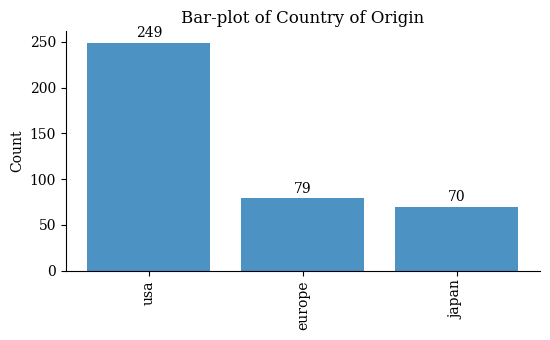

In [5]:
%matplotlib inline
import eda_report.plotting as ep

ax = ep.bar_plot(mpg_data["origin"], label="Country of Origin")
ax.figure

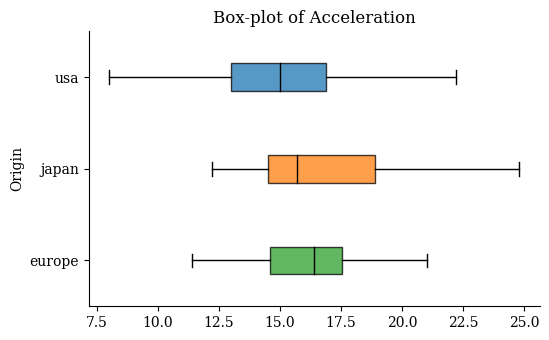

In [6]:
ax = ep.box_plot(mpg_data["acceleration"], label="Acceleration", hue=mpg_data["origin"])
ax.figure

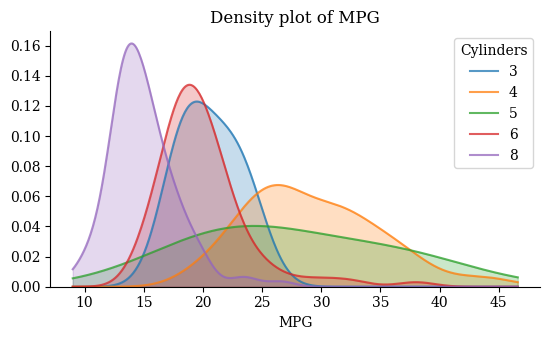

In [7]:
ax = ep.kde_plot(mpg_data["mpg"], label="MPG", hue=mpg_data["cylinders"])
ax.figure

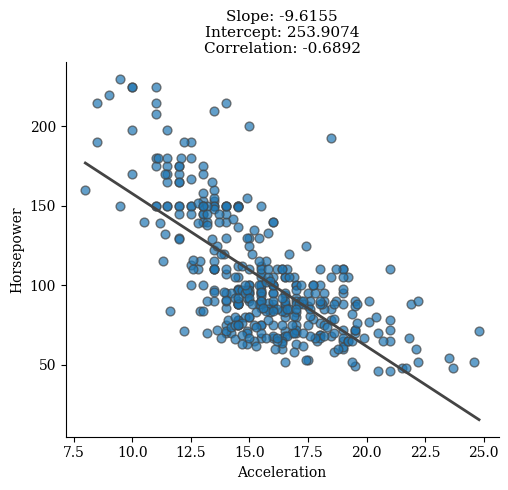

In [8]:
ax = ep.regression_plot(mpg_data["acceleration"], mpg_data["horsepower"],
                        labels=("Acceleration", "Horsepower"))
ax.figure

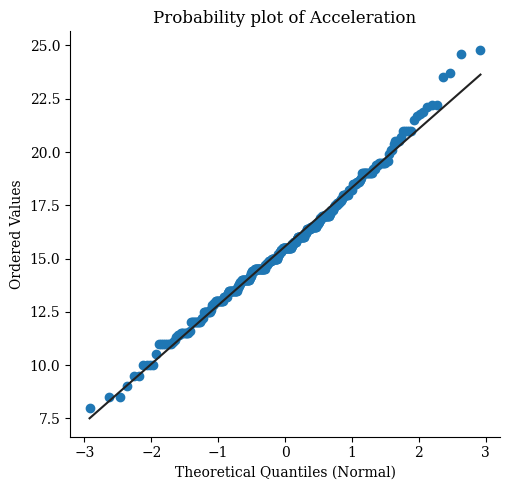

In [9]:
ax = ep.prob_plot(mpg_data["acceleration"], label="Acceleration")
ax.figure

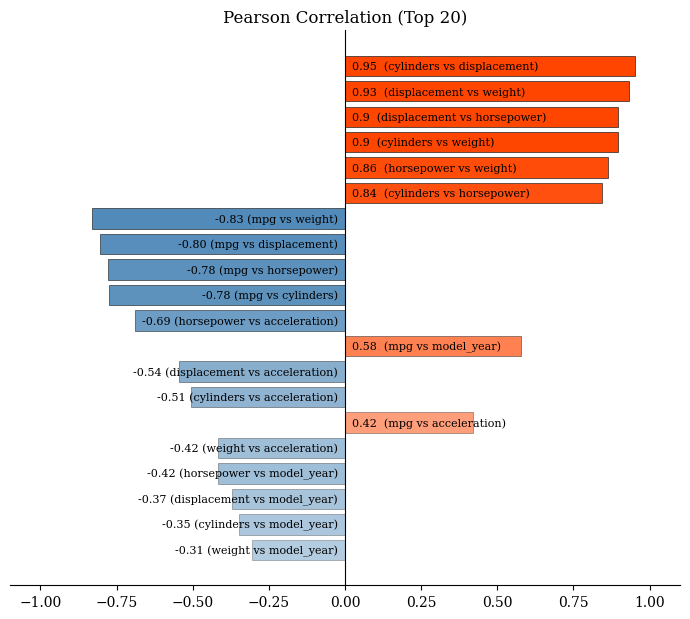

In [10]:
ax = ep.plot_correlation(mpg_data)
ax.figure

# 3. Generate a Report Document

In [11]:
file_name = "mpg-report.docx"
report = eda_report.get_word_report(mpg_data, output_filename=file_name)

Analyze variables:  100%|███████████████████████████████████| 9/9
Plot variables:     100%|███████████████████████████████████| 9/9
Bivariate analysis: 100%|███████████████████████████████████| 20/20 pairs.
[INFO 01:33:56.381] Done. Results saved as 'mpg-report.docx'


In [12]:
from IPython.display import FileLink

FileLink(file_name)  # Get link to the generated report

/home/tim/Projects/eda-report/mpg-report.docx